# Optimización convexa

## Función objetivo

\begin{equation}
f(x, y) = \frac{1}{2} (x^2 + \gamma y^2), \quad x, y \in \mathbb{R}
\end{equation}

In [20]:
f <- function(x, y, gammae=1){
    val <- 0.5 * (x**2 + gammae * y**2)
    return(val)
}

Representamos en una parte de R2

In [21]:
seqx <- seq(-5, 5, len=100) # formamos una rejilla en x
seqy <- seq(-5, 5, len=100) # formamos una rejilla en y

In [22]:
seqz2 <- outer(seqx, seqy, f)

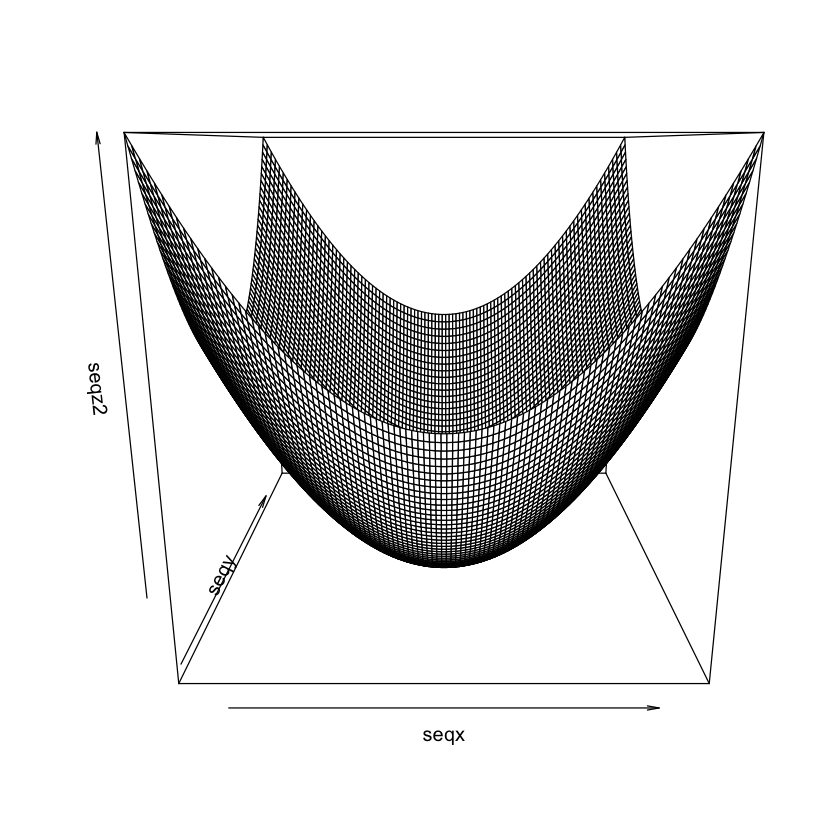

In [23]:
par(bg = "white")
persp(seqx, seqy, seqz2)

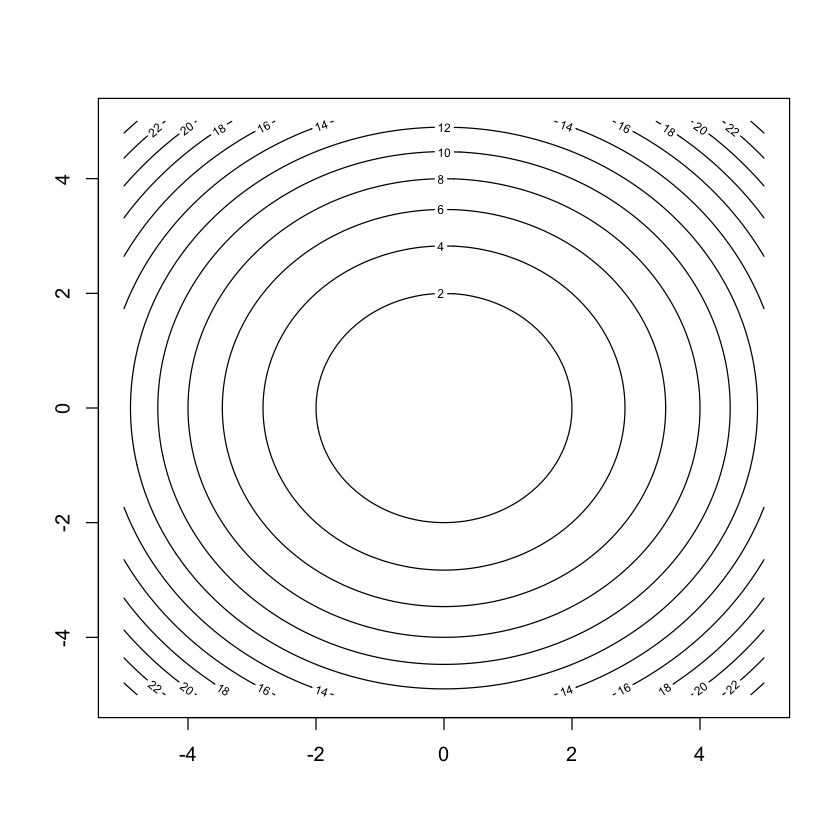

In [24]:
par(bg = "white")
contour(seqx, seqy, seqz2)

## Minimizar esta función. Descenso de gradiente

Algo del hessiano. Para la función que tenemos:
\begin{equation}
\frac{\partial^2 f}{\partial x^2} = 1, \quad \frac{\partial^2 f}{\partial x \partial y} = 0, \quad \frac{\partial^2 f}{\partial y^2} = \gamma
\end{equation}

El hessiano será diagonal y semidefinido positivo

\begin{equation}
\nabla^2 f = \begin{pmatrix}
1 & 0 \\
0 & \gamma
\end{pmatrix}, \quad \gamma > 0
\end{equation}

\begin{equation}
\begin{pmatrix}
x & y
\end{pmatrix}
\begin{pmatrix}
1 & 0 \\
0 & \gamma
\end{pmatrix}
\begin{pmatrix}
x & y
\end{pmatrix}^T = x^2 + \gamma y^2 \geq 0
\end{equation}

## Descenso de gradiente

Punto inicial $(x^{(0)}, y^{(0)})$ y calculamos las parciales para ver en que direccion/es nos tenemos que mover. 
\begin{equation}
\Delta x = -\nabla f = -(x, \gamma y)
\end{equation}

escogemos un paso $t > 0$. En la siguiente iteración, 
\begin{equation}
(x^{(k+1)}, y^{(k+1)}) = (x^{(k)}, y^{(k)}) + t \Delta x
\end{equation}

con un criterio de parada del estilo $||\nabla f(x,y)||^2 \leq \text{tol}$

En R, tomando el punto inicial $(\gamma , 1)$:

In [25]:
gammae <- 1
pk <- c(gammae, 1) # punto inicial
t <- 0.2 # paso
tol <- 10**(-5)# criterio de parada

# direccion
deltax <- function(x, y, gammae=1){-c(x, gammae*y)}

Empezamos a iterar

In [50]:
for (i in 1:1000){
    dir <- deltax(pk[1], pk[2], gammae)
    if (sum(dir**2) < tol){break}
    pk <- pk + t*dir
}

print(i)
print(pk)


[1] 1
[1] 0.001934281 0.001934281


Otras opciones

In [32]:
pk <- c(gammae, 1) # punto inicial
dir <- deltax(pk[1], pk[2], gammae)
while (sum(dir**2) > tol){
    pk <- pk + t*dir
    dir <- deltax(pk[1], pk[2], gammae)
}
print(pk)

[1] 0.001934281 0.001934281


Vamos a comprimir todo esto en una función

In [54]:
graddent <- function(gammae, puntoini=NULL, t=0.2, tol=10**(-5), nitermax=1000){
    if (is.null(puntoini)){
        puntoini <- c(gammae, 1)
    }
    deltax <- function(x, y, gammae=1){-c(x, gammae*y)}
    pk <- puntoini
    for (i in 1:nitermax){
        dir <- deltax(pk[1], pk[2], gammae)
        if (sum(dir**2) < tol){break}
        pk <- pk + t*dir
    }

    if (i < nitermax){
        sol <- pk
    }else{
        sol <- "No encontrada"
    }
    return(list(solucion=sol, niter=i, gradval=-dir))
}

graddent(2)

$solucion
[1] 3.094850e-03 3.684565e-07

$niter
[1] 30

$gradval
[1] 3.094850e-03 7.369131e-07

Ver graficamente el descenso de gradiente

Warning message in grad.desc(FUN = function(x, y) 0.5 * (x^2 + 2 * y^2), init = c(2, :
"Maximum number of iterations reached!"


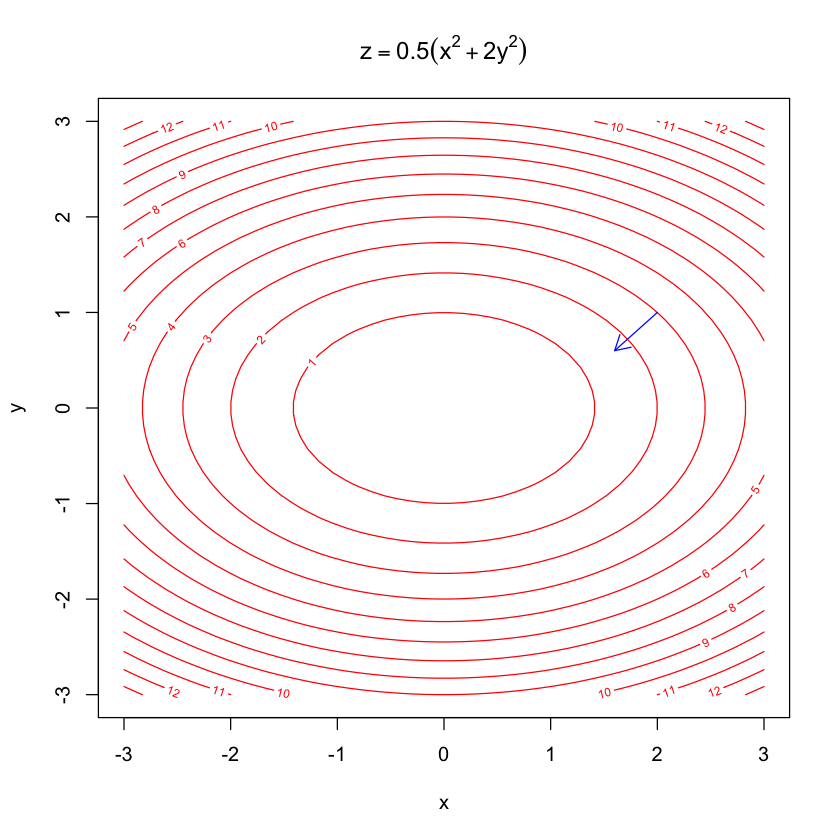

x    y 
1.28 0.36

Output at: grad_desc_animation.gif



[1] TRUE

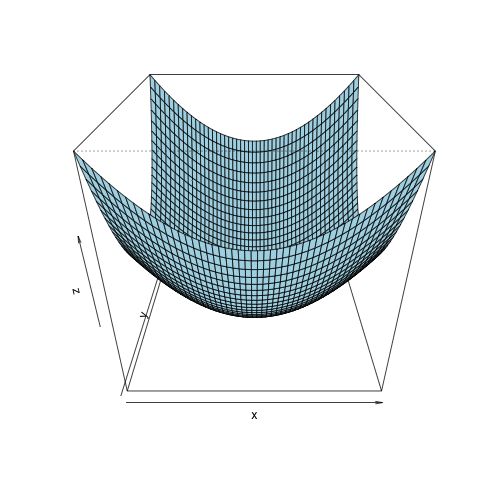

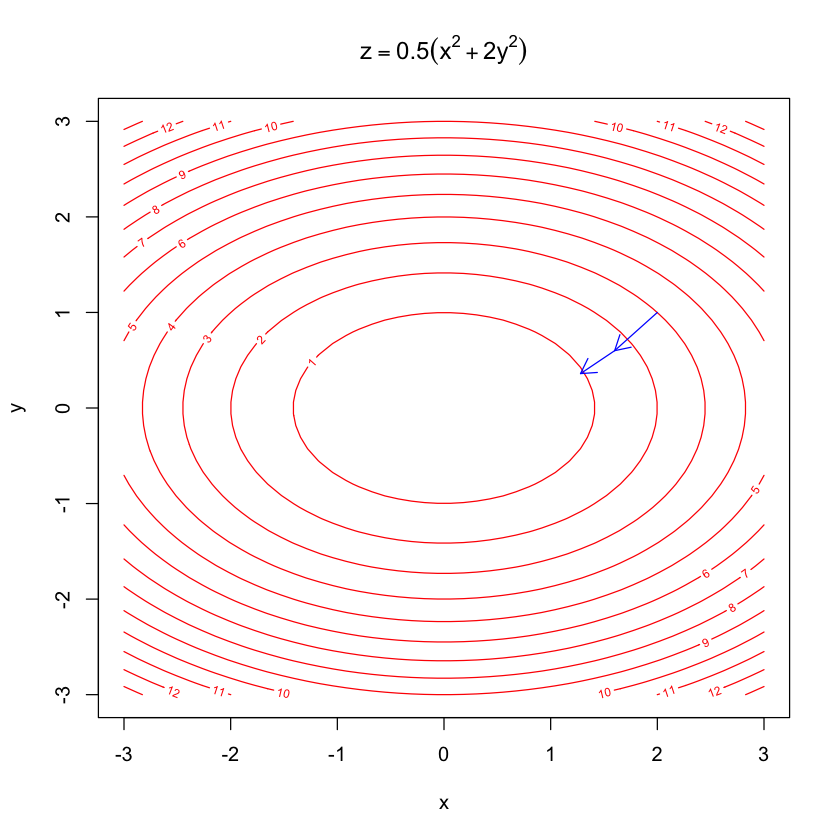

In [44]:
if (!requireNamespace("animation", quietly = TRUE)) install.packages("animation")
library(animation)
oopt = ani.options(interval = 0.3, nmax = ifelse(interactive(), 50, 2))
xx = grad.desc(FUN = function(x, y) 0.5 * (x^2 + 2 * y^2), init = c(2, 1), gamma = 0.2)
xx$par # solución


# Generar la gráfica 3D con el fondo blanco
saveGIF({
    for (i in 1:ani.options("nmax")) {
        par(bg = "white")  # Establecer el fondo de la figura a blanco
        xx$persp(col = "lightblue", phi = 30)
    }
}, movie.name = "grad_desc_animation.gif")


IRdisplay::display_png(file = "grad_desc_animation.gif")

### exact line search
\begin{equation}
f(x + s\Delta x) = f(x + sx, y + s\gamma y) = \frac{1}{2} ((x + sx)^2 + \gamma (y + s\gamma y)^2) 
\end{equation}
Derivo respecto a s e igualamos a 0 para ver el paso óptimo (habria que calcular en cada iteración)
\begin{equation}
\frac{\partial f}{\partial s} = 0 \Rightarrow s = \frac{x^2 + \gamma^2y^2}{x^2 + \gamma^3y^2}
\end{equation}

In [61]:
graddent2 <- function(gammae, puntoini=NULL, tol=10**(-5), nitermax=1000){
    if (is.null(puntoini)){
        puntoini <- c(gammae, 1)
    }
    deltax <- function(x, y, gammae=1){-c(x, gammae*y)}
    pk <- puntoini

    for (i in 1:nitermax){
        dir <- deltax(pk[1], pk[2], gammae)
        if (sum(dir**2) < tol){break}
        t <- (pk[1]**2 + gammae**2*pk[2]**2)/(pk[1]**2 + gammae**3*pk[2]**2)
        pk <- pk + t*dir
    }

    if (i < nitermax){
        sol <- pk
    }else{
        sol <- "No encontrada"
    }
    return(list(solucion=sol, niter=i, gradval=-dir))
}

graddent2(150)

$solucion
[1] 2.209062e-03 2.209062e-05

$niter
[1] 537

$gradval
[1] 0.002209062 0.002209062

### backtracking

In [ ]:
graddent3 <- function(gammae, puntoini=NULL, t=1, tol=10**(-5), nitermax=1000){
    if (is.null(puntoini)){
        puntoini <- c(gammae, 1)
    }
    pk <- puntoini

    for (i in 1:nitermax){
        dir <- deltax(pk[1], pk[2], gammae)
        if (sum(dir**2) < tol){break}
        parte1 = f(pk[1] + t^dir[1], pk[2] + t*dir[2], gammee)
        alpha = 0.5
        parte2 = f(pk[1], pk[2] - alpha*t*sum(dir**2), gammae)

        while (){
            t <- t/2
        }

        pk <- pk + t*dir
    }

    if (i < nitermax){
        sol <- pk
    }else{
        sol <- "No encontrada"
    }
    return(list(solucion=sol, niter=i, gradval=-dir))
}

graddent2(150)